In [1]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [5]:
import os

df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
1,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes


In [6]:
df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['Target'] = df['Target'].map( 
                   {'yes':1 ,'no':0}) 

In [7]:
df.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [10]:
df = df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
0,95,0,2282,0,0,21,207,17,-1,0,1
1,95,0,0,0,0,1,215,1,-1,0,0
2,94,0,1234,0,0,3,212,1,-1,0,0
3,93,0,775,0,0,22,860,2,177,7,1
4,93,0,775,0,0,4,476,2,13,9,1


In [13]:
# Normalize
df.groupby('Target').mean()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


In [14]:
y = df.Target.values
x_data = df.drop(['Target'], axis = 1)

In [16]:
x_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,95,0,2282,0,0,21,207,17,-1,0
1,95,0,0,0,0,1,215,1,-1,0
2,94,0,1234,0,0,3,212,1,-1,0
3,93,0,775,0,0,22,860,2,177,7
4,93,0,775,0,0,4,476,2,13,9


In [22]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [24]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [25]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [26]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [27]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [28]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [29]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [31]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [32]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.34662632075979255


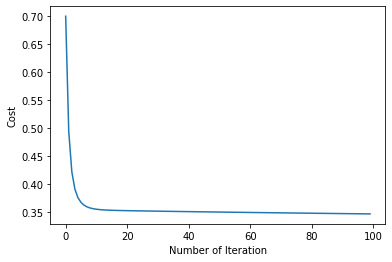

Manuel Test Accuracy: 88.93%


In [33]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [34]:
def predict(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    return y_prediction

In [39]:
# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# fit model
model.fit(X, y)
# make predictions on the entire training dataset
yhat = model.predict(X)
# connect predictions with outputs
for i in range(10):
	print(X[i], yhat[i])

[ 1.23839154 -2.8475005 ] 1
[-1.25884111 -8.57055785] 0
[ -0.86599821 -10.50446358] 0
[ 0.59831673 -1.06451727] 1
[ 2.12309797 -1.41131072] 1
[-1.53722693 -9.61845366] 0
[ 0.92194131 -0.68709327] 1
[-1.31478732 -8.78528161] 0
[ 1.57989896 -1.462412  ] 1
[ 1.36989667 -1.3964704 ] 1
